In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("../music_reccomendations/Processed_data.csv")
rec_df = pd.read_csv("../music_reccomendations/Processed_data_rec.csv")

In [38]:
def optimizs_k_means(df, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
        fig = plt.subplots(figsize= (10, 5))
        plt.plot(means, inertias, 'o-')
        plt.xlabel("Number of Clusters")
        plt.ylabel("Inertia")
        plt.grid(True)
        plt.show()
        

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


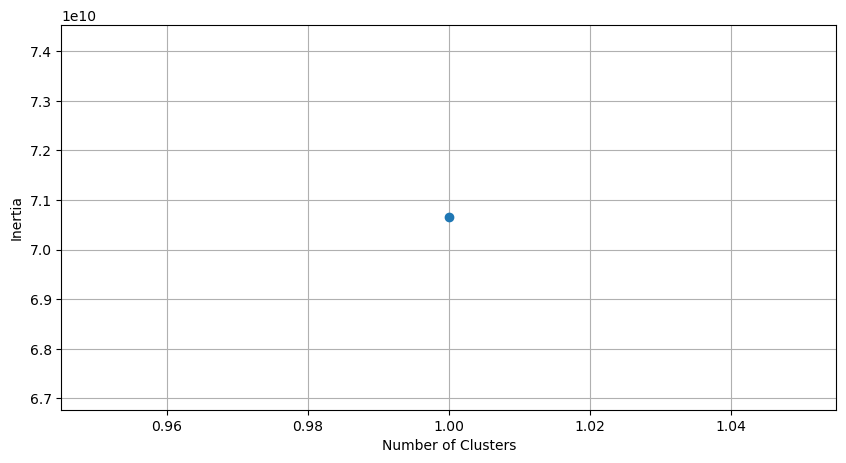

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


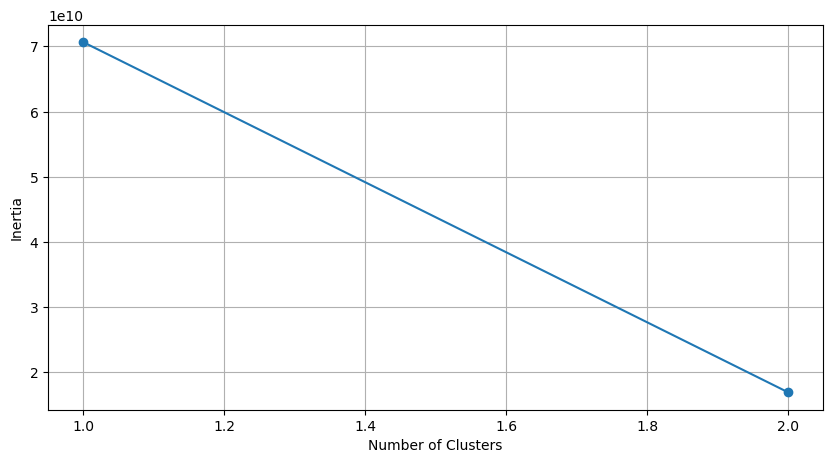

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


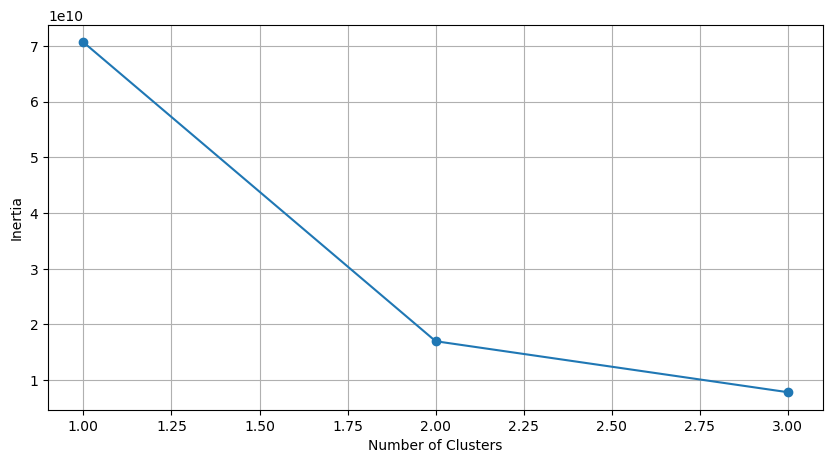

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


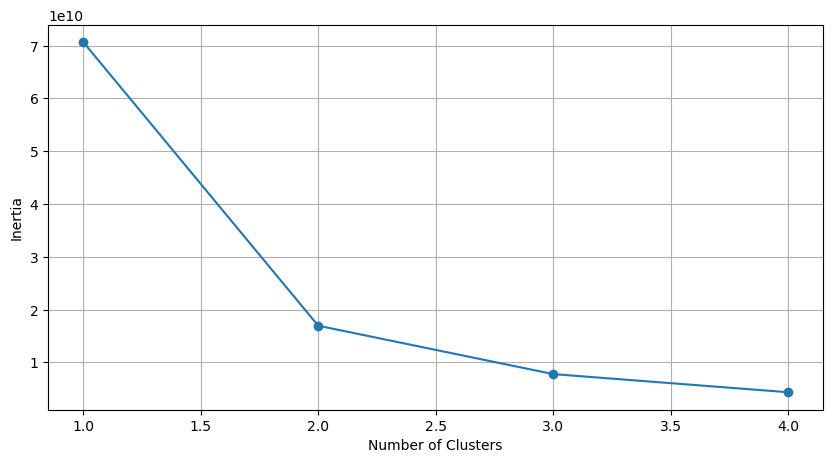

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


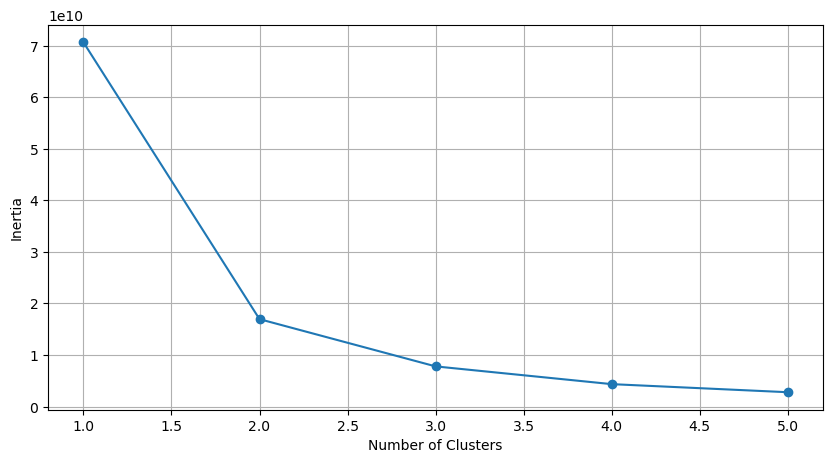

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


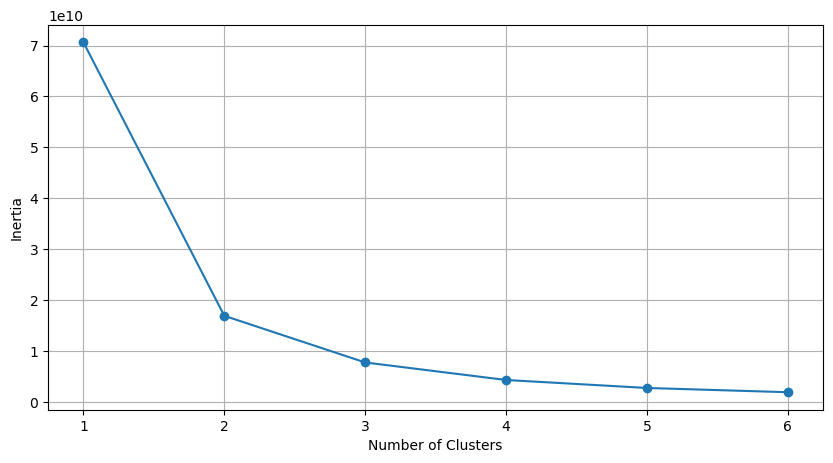

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


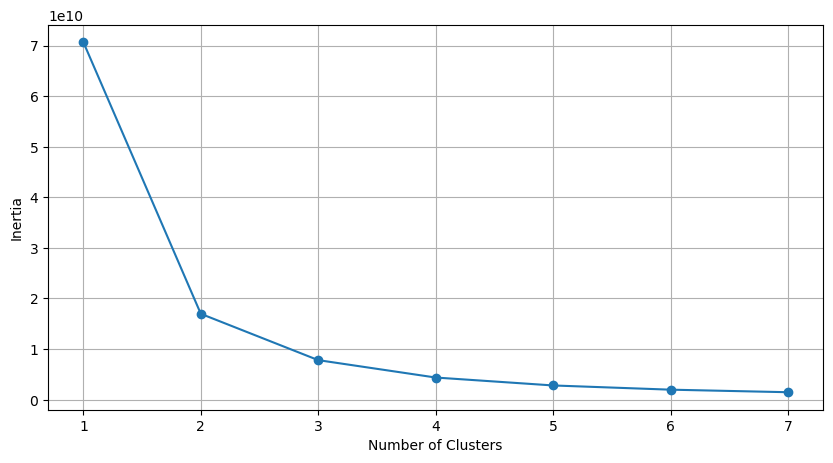

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


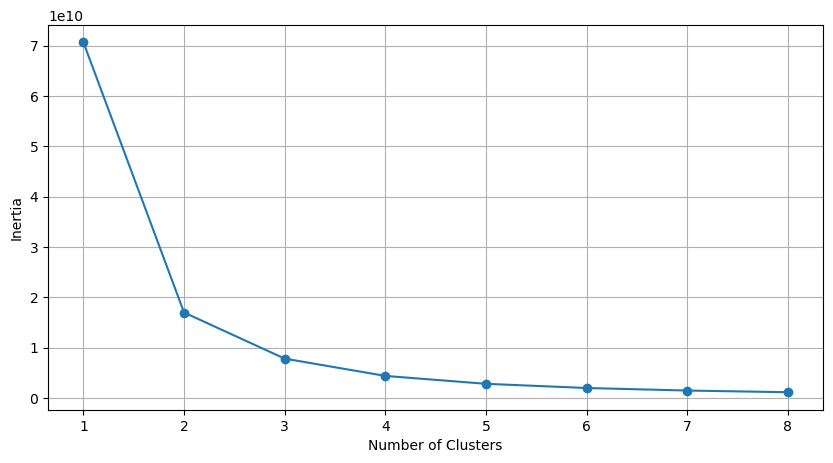

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


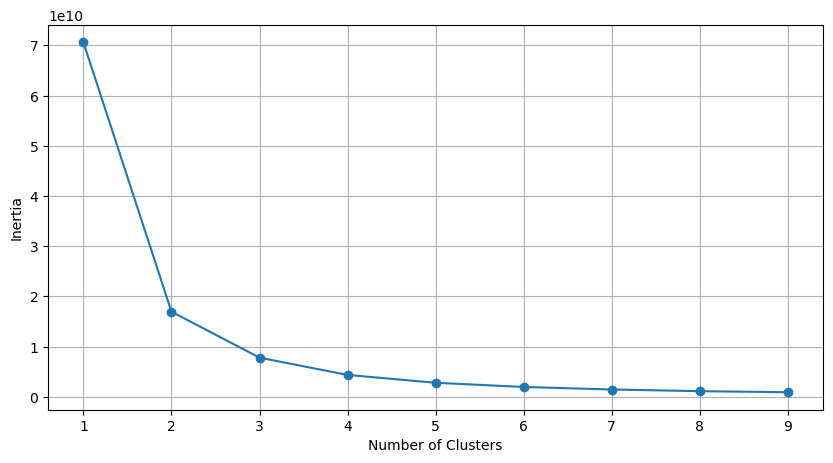

In [39]:
optimizs_k_means(df, 10)

As we see through the analysis we can regard two number of clusters as one of the best options for our modeling however considering the variety of themes around the songs, dividing them in two could be a bit too simplistic so we can increase the number of clusters to 3 or even 4 in order to acieve a more complex modeling.

In [215]:
kmeans = KMeans(n_clusters=3, init= 'k-means++', n_init='auto', max_iter=300)

kmeans.fit(df)

KMeans(n_clusters=3, n_init='auto')

In [216]:
df['kmeans_3'] = kmeans.labels_

In [217]:
df

,artist_name,release_date,genre,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,kmeans_3
0,3197,1950,4,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,...,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,5,1.000000,2
1,1597,1950,4,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,...,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,7,1.000000,1
2,2300,1950,4,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1,1.000000,2
3,3637,1950,4,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,...,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,4,1.000000,2
4,1726,1950,4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,4,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,2846,2019,2,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,3,0.014286,2
28358,2838,2019,2,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,...,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,3,0.014286,2
28359,3323,2019,2,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,...,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,3,0.014286,2
28360,5315,2019,2,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,...,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,3,0.014286,0


## Plotting the Results



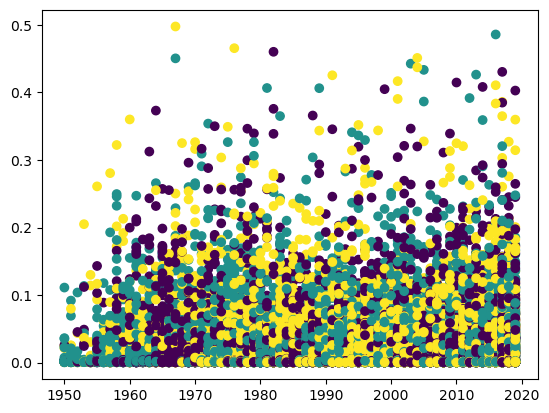

In [218]:

plt.scatter(x=df["release_date"], y=df["shake the audience"], c=df["kmeans_3"])

In [219]:
k_fit = kmeans.fit(df)

predictions = k_fit.labels_
type(predictions)
k_fit

KMeans(n_clusters=3, n_init='auto')

In [222]:
kmeans_rec = KMeans(n_clusters=3, init= 'k-means++', n_init='auto', max_iter=300)

# Fit KMeans on the original data
kmeans_rec.fit(df)

# Predict clusters for the new data
predicted_clusters = kmeans_rec.predict(rec_df)



rec_df['kmeans_3'] = predicted_clusters

rec_df


,artist_name,release_date,genre,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,kmeans_3
0,1,1998,5,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,5,0.314286,2
1,0,1993,4,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0,0.385714,2
2,9,1990,3,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,4,0.428571,2
3,2,1960,3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,3,0.857143,2
4,5,1966,3,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,2,0.771429,2
5,3,1952,2,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,...,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,4,0.971429,2
6,6,2000,5,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,...,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,1,0.285714,2
7,8,1970,0,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,3,0.714286,2
8,7,1986,1,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,...,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0,0.485714,2
9,4,2009,3,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,...,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,4,0.157143,2


In [224]:
df['kmeans_3'] = kmeans.labels_

reccomend = df["kmeans_3"] == 2

true_values = reccomend[reccomend]

true_values



0        True
2        True
3        True
5        True
7        True
         ... 
28355    True
28357    True
28358    True
28359    True
28361    True
Name: kmeans_3, Length: 8982, dtype: bool